## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing the dataset

In [ ]:
dataset_t = pd.read_csv('/content/drive/MyDrive/SVD_origcats_test.csv')
dataset_tr = pd.read_csv('/content/drive/MyDrive/SVD_origcats_train.csv')



In [ ]:
np.unique(dataset_t.iloc[:,1].values.astype("str"))

array(['Dysphonie', 'Funktionelle Dysphonie', 'Healthy',
       'Hyperfunktionelle Dysphonie', 'Laryngitis',
       'Psychogene Dysphonie', 'Rekurrensparese',
       'Spasmodische Dysphonie'], dtype='<U27')

In [ ]:
dataset_t.iloc[:,-1].values.shape

(989,)

In [ ]:
columns=[f"feature{i}" for i in range(1,513)]
columns.insert(0,"labels")

In [ ]:
dataset_t

,Unnamed: 0,label,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature503,feature504,feature505,feature506,feature507,feature508,feature509,feature510,feature511,feature512
0,0,Healthy,32.503340,2.990599,10.159030,48.947490,21.321196,3.373409,3.487427,34.882980,...,29.828766,27.092773,4.071680,4.293449,16.782892,40.440273,6.140901,3.120304,23.135357,43.363850
1,1,Healthy,2.214908,4.042516,6.465150,3.475747,4.274242,7.643457,3.016757,4.454148,...,1.974134,1.732393,2.779021,3.230751,1.947851,5.375444,3.571047,5.951644,2.825528,6.506819
2,2,Funktionelle Dysphonie,2.779501,9.617011,3.816407,5.109054,2.638494,4.595191,5.682609,3.801870,...,2.043600,1.630799,6.399184,3.658299,1.443301,4.622350,1.196363,8.352748,1.561593,8.066490
3,3,Healthy,14.105877,1.523729,3.889558,24.499805,13.906150,4.033707,2.250567,15.151248,...,10.742015,12.600979,4.537219,9.856754,9.168246,18.928308,3.215144,6.987490,13.061122,16.418642
4,4,Healthy,29.614435,4.140284,3.659196,45.703823,26.985228,7.375724,2.330595,36.590324,...,32.020664,27.040218,2.471783,6.041367,21.906347,36.598200,2.379075,5.406830,26.880934,47.730106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
984,984,Rekurrensparese,1.381604,6.853614,9.480045,2.174859,2.287681,2.943508,5.133865,3.830948,...,1.706016,1.678310,1.231418,2.603037,2.067346,4.108361,4.661980,2.335104,1.753145,8.040253
985,985,Healthy,11.368980,2.985572,5.701570,19.625744,12.041018,3.172711,2.579109,12.791857,...,9.871325,8.802383,4.196237,9.854582,9.168246,13.817292,6.864669,4.095129,13.061122,15.435963
986,986,Healthy,34.877820,5.204372,8.256871,51.795930,25.069025,4.371907,2.626653,35.314934,...,35.478850,31.251717,5.673224,6.747490,19.816376,39.401173,8.158171,5.719873,29.874266,45.333050
987,987,Healthy,29.760998,2.832937,7.579190,46.040420,18.016466,5.149061,3.411314,29.937046,...,31.154388,26.508213,3.780942,9.915910,16.143595,32.818996,6.385417,3.189238,27.077238,35.937164


#Importing all data to find the confused classifications

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/SVD_origcats_with_IDs.csv')

In [ ]:
dataset

,Unnamed: 0,label,IDs,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature503,feature504,feature505,feature506,feature507,feature508,feature509,feature510,feature511,feature512
0,0,Funktionelle Dysphonie,1862-a_n.wav,11.970857,8.647340,4.034947,21.178638,11.112652,4.913324,5.868234,...,9.871318,9.918426,3.623702,9.856940,9.168243,14.236090,6.532731,5.127195,13.061115,12.902570
1,1,Funktionelle Dysphonie,1862-a_n.wav,1.426906,8.315419,4.396900,3.620208,3.577867,5.138603,6.759943,...,2.259536,3.599430,3.365763,3.261760,0.451162,5.357986,7.106049,6.064056,2.305323,6.325994
2,2,Funktionelle Dysphonie,1862-a_n.wav,1.895407,7.249681,4.833377,4.030141,2.204012,4.873182,6.839329,...,2.647174,3.730398,4.884506,3.272148,0.405347,5.409276,6.448775,5.835445,2.356296,5.933195
3,3,Funktionelle Dysphonie,1862-a_n.wav,32.355232,5.545015,6.115311,48.818043,21.687473,5.445684,5.451955,...,33.455257,29.269058,4.408365,9.915911,17.263302,36.260406,6.694450,6.021323,28.081223,39.840733
4,4,Funktionelle Dysphonie,1645-a_n.wav,13.004597,7.357682,9.458171,22.866602,14.013184,3.165614,7.024565,...,9.871318,9.311245,4.252212,9.857243,9.168243,17.046170,6.756319,8.307286,13.061115,17.937210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3948,3948,Laryngitis,2315-a_n.wav,2.465457,5.591063,5.972780,5.640511,3.179796,3.235196,4.750126,...,2.455229,2.975010,3.988311,3.914249,1.010555,5.429365,1.901641,8.209708,1.565053,6.181050
3949,3949,Laryngitis,2315-a_n.wav,3.061257,4.388468,6.597216,7.766479,3.361286,4.155781,3.829790,...,2.387838,2.450887,4.676728,3.522888,1.679552,5.194174,1.007677,6.778826,2.137283,7.341762
3950,3950,Laryngitis,2315-a_n.wav,17.355824,4.798000,6.966336,26.332170,16.606434,3.381724,3.446626,...,10.889083,4.494203,4.224337,3.320841,1.064298,10.247732,0.658253,5.429225,9.001617,24.801344
3951,3951,Psychogene Dysphonie,2316-a_n.wav,16.860882,6.963873,3.401542,25.720470,15.067305,2.164036,3.458860,...,12.254561,12.662150,5.614644,9.858358,9.168243,20.454115,3.184131,8.013387,13.061115,20.643480


In [ ]:
X_t=dataset.iloc[:,3:].values
y_t=dataset.iloc[:,1].values
ID_t=dataset.iloc[:,2].values

#X,Y

In [ ]:
X_train=dataset_tr[dataset_tr["label"]!="Healthy"].iloc[:,2:].values
y_train=dataset_tr[dataset_tr["label"]!="Healthy"].iloc[:,1].values

X_test=dataset_t[dataset_t["label"]!="Healthy"].iloc[:,2:].values
y_test=dataset_t[dataset_t["label"]!="Healthy"].iloc[:,1].values

In [ ]:
X_train = dataset_tr.iloc[:,2:].values
y_train = dataset_tr.iloc[:,1].values

In [ ]:
X_test = dataset_t.iloc[:,2:].values
y_test = dataset_t.iloc[:,1].values

# label encoder

In [ ]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train=le.transform(y_train)
y_test=le.transform(y_test)


In [ ]:
y_t=le.transform(y_t)

In [ ]:
le.classes_


array(['Dysphonie', 'Funktionelle Dysphonie', 'Healthy',
       'Hyperfunktionelle Dysphonie', 'Laryngitis',
       'Psychogene Dysphonie', 'Rekurrensparese',
       'Spasmodische Dysphonie'], dtype=object)

In [ ]:
len(le.classes_)

8

In [ ]:
"""X = dataset.iloc[:, 4:].values
y = dataset.loc[:, "Diagnosis"].values"""

'X = dataset.iloc[:, 4:].values\ny = dataset.loc[:, "Diagnosis"].values'

In [ ]:
X_train.shape,len(y_train)

((2964, 512), 2964)

In [ ]:
X_test.shape,len(y_test)

((989, 512), 989)

In [ ]:
y_test

array([2, 2, 1, 2, 2, 6, 3, 3, 2, 2, 4, 2, 1, 6, 2, 3, 2, 2, 2, 2, 2, 0,
       2, 6, 2, 6, 3, 4, 2, 7, 2, 4, 3, 6, 4, 2, 6, 2, 2, 1, 2, 0, 2, 2,
       2, 6, 2, 6, 2, 2, 6, 6, 2, 2, 3, 2, 0, 7, 4, 2, 2, 2, 2, 2, 2, 2,
       6, 2, 6, 2, 2, 3, 2, 2, 6, 3, 7, 7, 6, 1, 0, 2, 2, 1, 2, 6, 2, 0,
       2, 5, 2, 6, 3, 3, 3, 2, 3, 2, 2, 2, 4, 2, 2, 2, 3, 2, 4, 4, 7, 6,
       3, 2, 3, 2, 2, 6, 2, 3, 2, 2, 2, 6, 2, 2, 2, 6, 4, 0, 2, 2, 6, 6,
       2, 6, 3, 6, 2, 1, 2, 2, 2, 5, 6, 2, 2, 2, 2, 2, 2, 2, 7, 2, 2, 2,
       2, 2, 6, 6, 6, 2, 6, 6, 2, 3, 7, 2, 2, 2, 2, 0, 3, 6, 2, 0, 4, 1,
       3, 0, 3, 2, 2, 2, 2, 0, 2, 6, 3, 0, 2, 2, 2, 3, 7, 7, 2, 2, 2, 2,
       2, 0, 1, 2, 6, 2, 2, 0, 0, 3, 2, 2, 2, 2, 2, 0, 2, 6, 2, 2, 2, 2,
       2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 2, 2, 6, 2, 6, 3, 2,
       2, 4, 3, 3, 2, 7, 6, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2,
       2, 6, 2, 3, 2, 2, 2, 6, 2, 2, 6, 0, 2, 2, 2, 6, 3, 2, 6, 2, 4, 2,
       3, 0, 2, 3, 0, 3, 2, 2, 3, 6, 2, 2, 0, 3, 0,

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_t=sc.transform(X_t)

In [ ]:
X_train

array([[-0.05348764, -0.69484413, -1.2375423 , ..., -0.43974043,
         0.10087241, -0.42432445],
       [ 1.7945662 , -0.45392019,  0.77339467, ...,  0.16684682,
         1.81821822,  1.62512749],
       [-0.90488262,  1.04352827,  0.27526454, ...,  1.12749727,
        -1.01422589, -0.79220574],
       ...,
       [-0.20696125,  1.98718175, -0.16761363, ..., -1.75692535,
         0.10087241, -0.31485155],
       [-0.76081755,  0.05686484,  0.15995048, ...,  1.6085563 ,
        -1.00340863, -0.61516902],
       [ 1.35013004, -1.04493941,  0.34682443, ...,  0.10131195,
         1.460288  ,  1.2067809 ]])

# Applying PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components =40)
X_train = pca.fit_transform(X_train)
X_test=pca.transform(X_test)
#X = pca.fit_transform(X)

In [ ]:
X_t=pca.transform(X_t)

In [ ]:
from sklearn.decomposition import KernelPCA
pca = KernelPCA(n_components =40,kernel="rbf")
X_train = pca.fit_transform(X_train)
X_test=pca.transform(X_test)

# Applying LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2,)
lda.fit(X_train,y_train)
X_train = lda.transform(X_train)
X_test = lda.transform(X_test)


# Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25 )

#TSNE

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne=TSNE(n_components=3)
X_train1=tsne.fit_transform(X_train,y_train)


In [ ]:
from sklearn.manifold import Isomap
tsne=Isomap(n_neighbors=5,n_components=2)
X_train=tsne.fit_transform(X_train,y_train)
X_test=tsne.transform(X_test)


In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
ltsa = LocallyLinearEmbedding(n_components=2, method='standard', n_neighbors=5)
X_train = ltsa.fit_transform(X_train,y_train)
X_test=ltsa.transform(X_test)

In [ ]:
X_train


array([[ 0.01838658, -0.00991868],
       [ 0.01838658,  0.03123238],
       [ 0.01838658, -0.01219642],
       ...,
       [ 0.01838658, -0.00903607],
       [ 0.01838658, -0.01219625],
       [ 0.01838658,  0.03126519]])

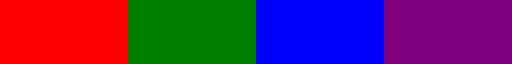

In [ ]:
ListedColormap(('red', 'green',"blue","purple"))

<ipython-input-17-6386e52c78b6>:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = j)


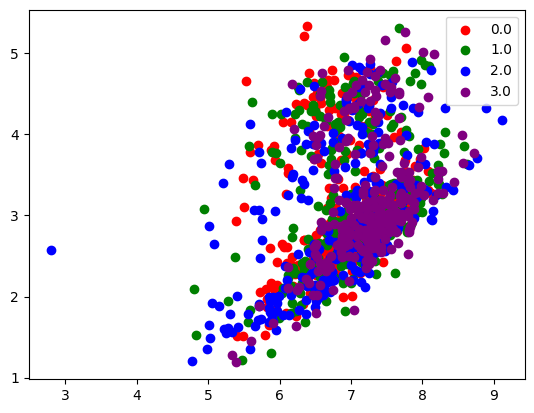

In [ ]:
from matplotlib.colors import ListedColormap
for i, j in enumerate(np.unique(y_test)):
    plt.scatter(X_train[y_train == j, 0], X_train[y_train == j, 1], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = j)
plt.legend()
plt.show()

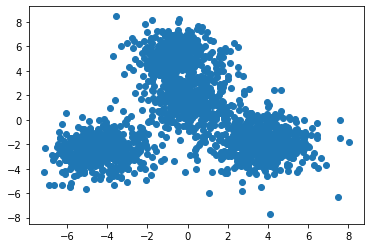

In [ ]:
plt.scatter(np.concatenate([X_train[:,0],X_test[:,0]]),np.concatenate([X_train[:,1],X_test[:,1]]))

# Principal Component Analysis (PCA)

#RANDOM FORREST




## Training the Random Forest Classification model on the Training set

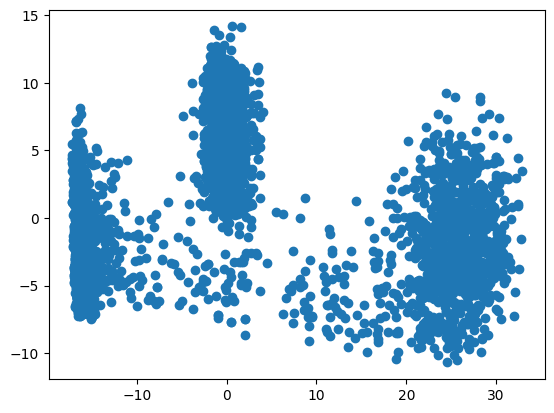

In [ ]:
plt.scatter(np.concatenate([X_train[:,0],X_test[:,0]]),np.concatenate([X_train[:,1],X_test[:,1]]))

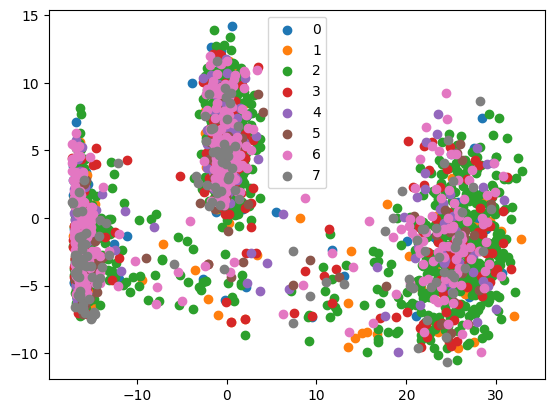

In [ ]:

from matplotlib.colors import ListedColormap
X_set,y_set=np.concatenate([X_train]),np.concatenate([y_train])
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = j)
plt.legend()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators =50, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

## Predicting a new result

## Predicting the Test set results

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 2]
 [1 1]
 ...
 [2 2]
 [2 2]
 [2 2]]


## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 18   0  24   1   0   0   1   0]
 [  0  16  24   4   2   0   1   0]
 [  0   0 516   1   0   0   0   0]
 [  0   1  56  49   1   1   2   4]
 [  1   1  26   0  20   0   4   0]
 [  1   0  13   3   0  18   0   1]
 [  2   1  58   0   1   0  81   0]
 [  0   1  15   0   0   0   3  17]]


0.7431749241658241

## Visualising the Training set results

<ipython-input-19-6ea2e16c394c>:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X_set[y_set == j, 0], X_set[y_set == j,1], X_set[y_set == j,3], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = j)


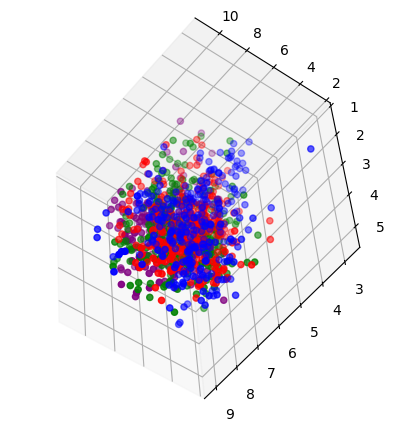

In [ ]:
from matplotlib.colors import ListedColormap
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X_set,y_set=X_train,y_train
for i, j in enumerate(np.unique(y_set)):
    ax.scatter(X_set[y_set == j, 0], X_set[y_set == j,1], X_set[y_set == j,3], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = j)
    ax.view_init(elev=25., azim=120, roll=60)
plt.show()

<ipython-input-21-02869a179a92>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = labs[i])


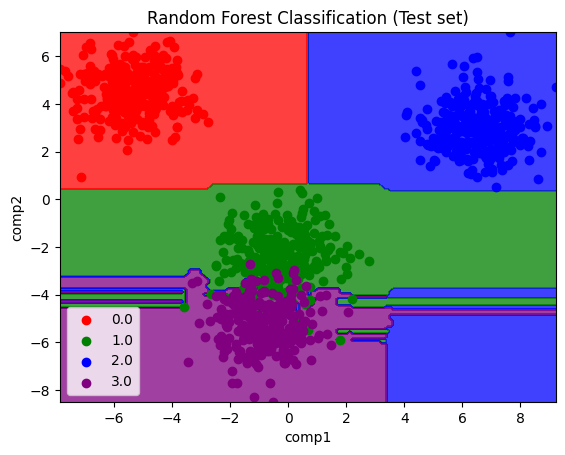

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max() , step = 0.1),
                     np.arange(start = X_set[:, 1].min() , stop = X_set[:, 1].max() , step = 0.1))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green',"blue","purple")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
labs=np.unique(y_test)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green',"blue","purple"))(i), label = labs[i])
plt.title('Random Forest Classification (Test set)')
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.legend()
plt.show()

## Visualising the Test set results

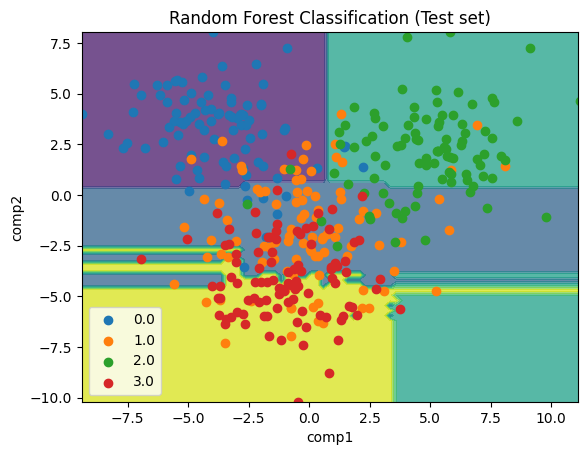

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max() , step = 0.25),
                     np.arange(start = X_set[:, 1].min() , stop = X_set[:, 1].max() , step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
labs=np.unique(y_test)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],  label = labs[i])
plt.title('Random Forest Classification (Test set)')
plt.xlabel('comp1')
plt.ylabel('comp2')
plt.legend()
plt.show()

#SVM

In [ ]:
from collections import Counter
Counter(list(y_train))

Counter({2: 1529, 4: 174, 3: 326, 0: 145, 7: 132, 1: 174, 6: 375, 5: 109})

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel ="rbf"  )
classifier.fit(X_train, y_train)

SVC()

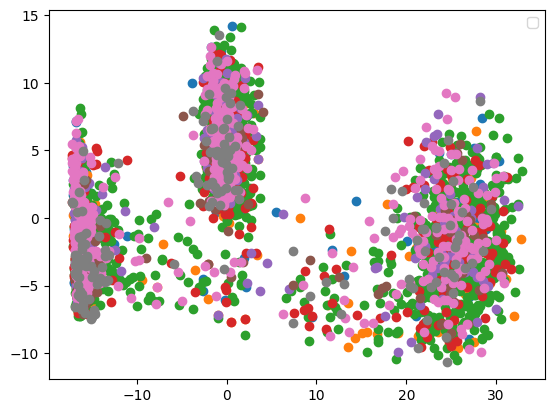

In [ ]:
for k,i in enumerate(np.unique(y_test)):
    plt.scatter(np.concatenate([X_train[y_train[:]==i,0],X_test[y_test[:]==i,0]]),np.concatenate([X_train[y_train[:]==i,1],X_test[y_test[:]==i,1]]))
    plt.legend()

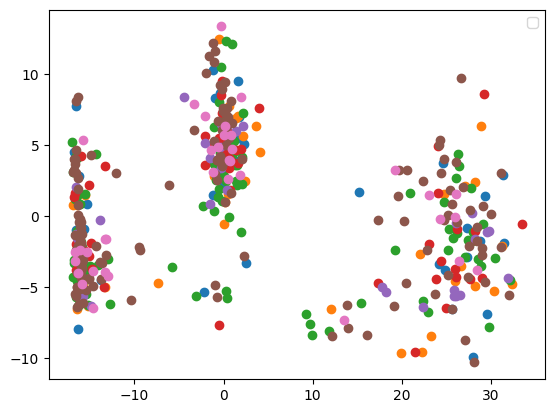

In [ ]:
for k,i in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test[:]==i,0],X_test[y_test[:]==i,1])
    plt.legend()

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [2 2]
 [1 1]
 ...
 [2 2]
 [2 2]
 [2 2]]


In [ ]:
y_pred_t = classifier.predict(X_t)
print(np.concatenate((y_pred_t.reshape(len(y_pred_t),1), y_t.reshape(len(y_t),1)),1))

[[1 1]
 [1 1]
 [1 1]
 ...
 [4 4]
 [5 5]
 [6 5]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_t, y_pred_t)
print(cm)
accuracy_score(y_t, y_pred_t)

[[ 167    0   12    0    2    1    7    0]
 [   2  192   11    9    2    0    5    0]
 [   1    1 2036    3    2    0    3    0]
 [   0    6   18  401    1    4    5    5]
 [   1    4   13    1  197    3    7    0]
 [   3    0    8    4    0  129    1    0]
 [   6    9   15    4    6    1  475    2]
 [   0    3    8    0    0    0    5  152]]


0.9483936250948647

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 25   0  12   0   2   1   4   0]
 [  2  28  11   4   2   0   0   0]
 [  1   1 507   3   2   0   3   0]
 [  0   2  18  81   1   2   5   5]
 [  1   1  13   1  29   3   4   0]
 [  1   0   8   3   0  23   1   0]
 [  4   3  15   0   6   1 112   2]
 [  0   1   6   0   0   0   5  24]]


0.8382204246713852

In [ ]:
y_pred = classifier.predict(X_train)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_train.reshape(len(y_train),1)),1))

[[2 2]
 [2 2]
 [2 4]
 ...
 [6 4]
 [2 2]
 [2 6]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_train, y_pred)
print(cm)
accuracy_score(y_train, y_pred)

[[   0    0  134    0    0    0   11    0]
 [   0    0  144    8    0    0   22    0]
 [   0    0 1529    0    0    0    0    0]
 [   0    0  242   76    0    0    8    0]
 [   0    0  157    1    0    0   16    0]
 [   0    0   97    2    0    0   10    0]
 [   0    0  137    1    0    0  237    0]
 [   0    0  110    0    0    0   22    0]]


0.6214574898785425

In [ ]:
labs={0:'Adduction deficit',
 1:'Healthy',
 2:'Non-Organic Dysphonia',
 3:'Vocal Fold Inflammation',
 4:'Vocal Fold Lesion'}

In [ ]:
cm

array([[ 27,   0,  11,   0,   1,   1,   4,   0],
       [  2,  28,  10,   5,   2,   0,   0,   0],
       [  1,   1, 508,   2,   2,   0,   3,   0],
       [  0,   2,  18,  81,   1,   2,   5,   5],
       [  1,   1,  13,   1,  29,   3,   4,   0],
       [  1,   0,   7,   3,   0,  24,   1,   0],
       [  5,   3,  15,   0,   6,   1, 111,   2],
       [  0,   1,   6,   0,   0,   0,   5,  24]])

<ipython-input-43-1bf06e3d3ee5>:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, ticks=np.linspace(0, 100, num=11))


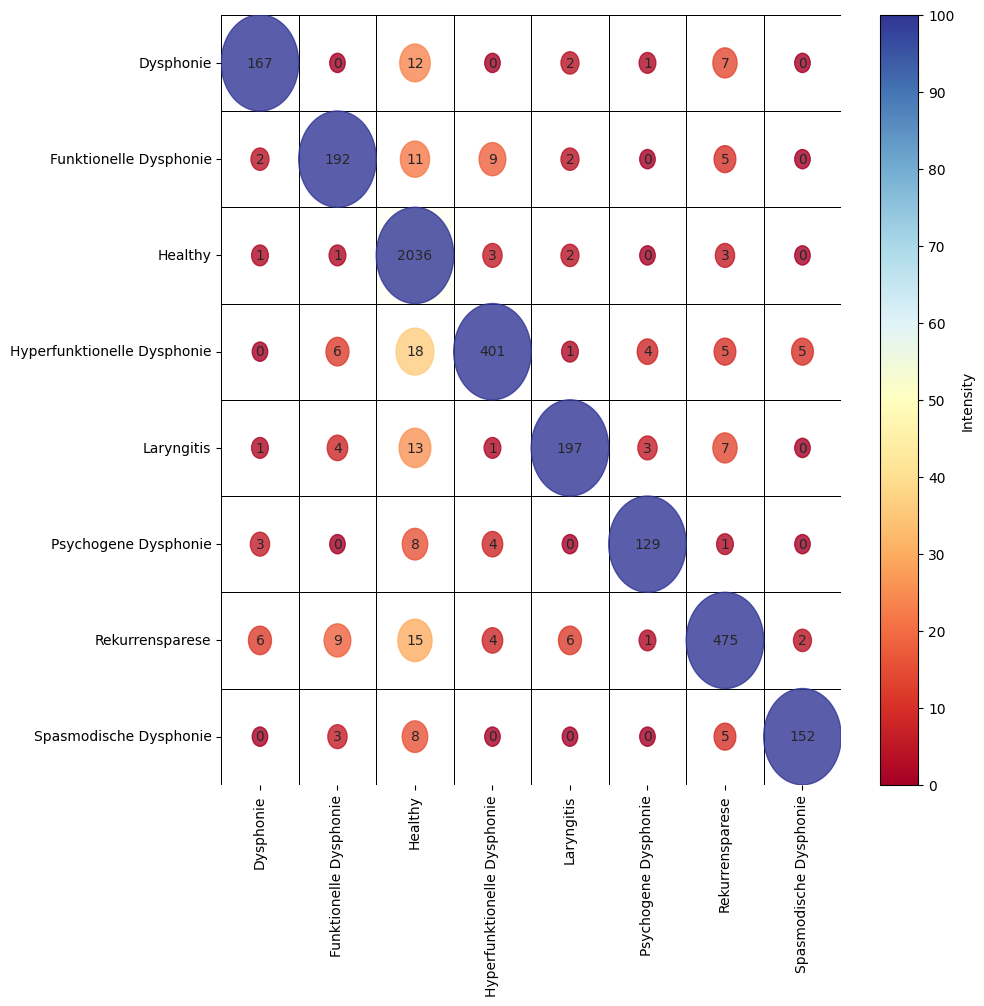

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".0f", cbar=False,cmap="afmhot_r" ,vmax=100000,linecolor="black",linewidths=0.4,xticklabels=le.classes_,yticklabels=le.classes_)

# Normalize the data for circle sizes
max_val = np.max(cm)  # Set the maximum value for normalization and color scale
normalized_data = cm / 50
for i,n in enumerate(normalized_data):
  for j,m in enumerate(n):
    if m>=1:
      normalized_data[i,j]=1

# Overlay circles
for y in range(cm.shape[0]):
    for x in range(cm.shape[1]):
        size = normalized_data[y, x] * 0.4+0.1 # Adjust this factor to control the circle size
        color = plt.cm.RdYlBu(normalized_data[y, x])  # Use the same colormap for color
        circle = plt.Circle((x + 0.5, y + 0.5), size, color=color, alpha=0.8)
        plt.gca().add_artist(circle)

# Add labels and show plot
# Replace 'le.classes_' with your actual class labels
norm = Normalize(vmin=0, vmax=100)
sm = ScalarMappable(cmap="RdYlBu", norm=norm)
sm.set_array([])  # Only needed for the color bar

cbar = plt.colorbar(sm, ticks=np.linspace(0, 100, num=11))
cbar.ax.set_yticklabels([str(int(i)) for i in np.linspace(0, 100, num=11)])
cbar.set_label('Intensity')
plt.show()

In [ ]:
index=[]
for i in range(len(y_pred_t)):
  if y_t[i]==y_pred_t[i]:
    index.append(False)
  elif le.inverse_transform([y_pred_t[i]])==["Healthy"]:
    index.append(True)
  else:
    index.append(False)
index=np.array(index)

In [ ]:
len(y_t),len(index),len(y_pred_t)

(3953, 3953, 3953)

In [ ]:
confusedlabels=pd.DataFrame(np.column_stack([le.inverse_transform(y_t[index]),le.inverse_transform(y_pred_t[index]),ID_t[index]]),columns=["actual","prediction","ID"])

In [ ]:
confusedlabels.to_csv("confusedlabels.csv")

<Axes: >

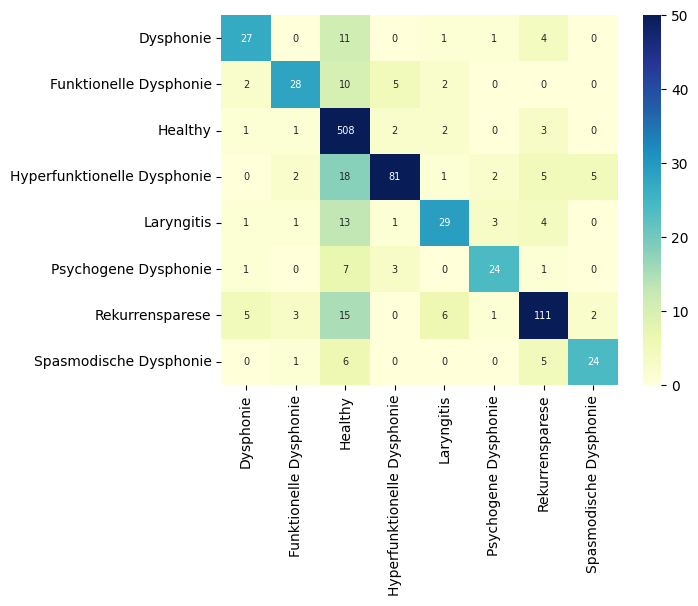

In [ ]:
sns.heatmap(cm , annot=True,yticklabels=le.classes_,fmt=".0f",xticklabels=le.classes_,annot_kws={"size":7},vmax=50, cmap="YlGnBu")

In [ ]:
labs[0]

'Adduction deficit'

NameError: name 'labs' is not defined

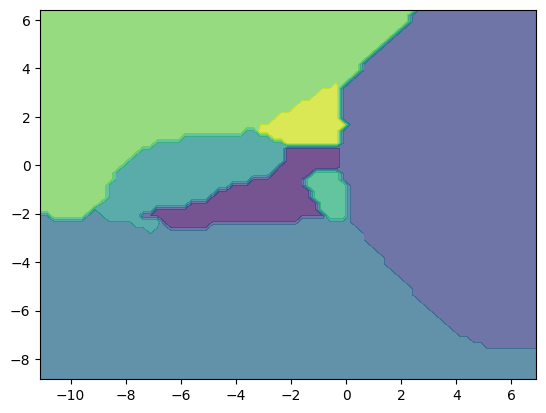

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() , stop = X_set[:, 0].max(), step = 0.25),
                     np.arange(start = X_set[:, 1].min() , stop = X_set[:, 1].max() , step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],  label = labs[i])
plt.title('Kernel SVM (Training set)')
plt.xlabel('Comp2')
plt.ylabel('Comp1')
plt.legend()
plt.show()

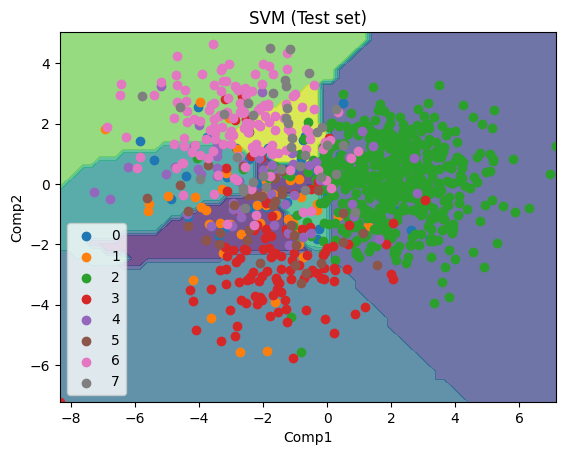

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min(), stop = X_set[:, 0].max(), step = 0.25),
                     np.arange(start = X_set[:, 1].min(), stop = X_set[:, 1].max() , step = 0.25))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75)
plt.xlim(X1.min(), X1.max())

plt.ylim(X2.min(), X2.max())
labs=np.unique(y_test)
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], label = labs[i])
plt.title('SVM (Test set)')
plt.xlabel('Comp1')
plt.ylabel('Comp2')
plt.legend()
plt.show()

#Training the Logistic Regression model on the Training set

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[77  9  3  2]
 [ 5 75 10  5]
 [ 1  0 92  2]
 [ 5  4  1 89]]


0.8763157894736842

## Visualising the Training set results

<ipython-input-27-c1adee37c3c9>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


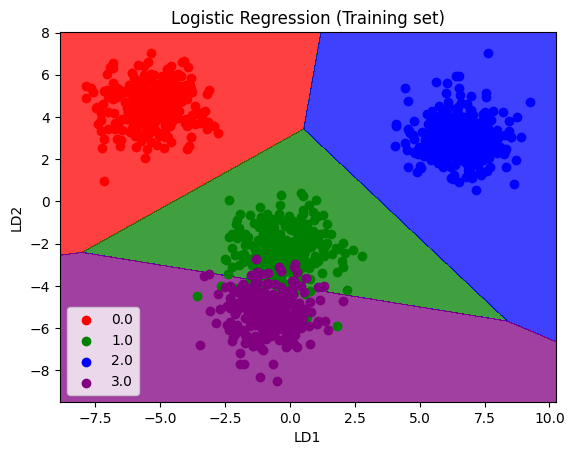

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue',"purple")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue',"purple"))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

## Visualising the Test set results

<ipython-input-28-de45a3719c0d>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


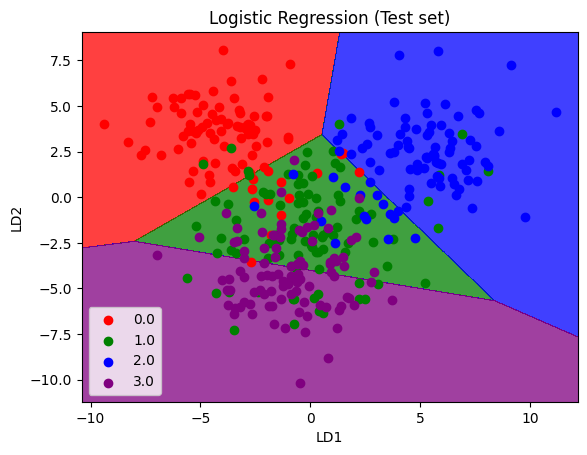

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue',"purple")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', "blue","purple"))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.show()

# Training XGBoost on the Training set

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 23   0  13   0   3   1   3   1]
 [  2  29   6   4   3   0   3   0]
 [  0   1 503   2   2   0   5   4]
 [  0   3  30  60   3   3  10   5]
 [  1   2  16   2  27   1   3   0]
 [  1   0   9   4   0  19   0   3]
 [  3   2  18   4   2   2 109   3]
 [  0   1   7   0   2   0   5  21]]


0.7997977755308392

In [ ]:
y.reshape(-1,1)

array([[3.],
       [3.],
       [1.],
       ...,
       [1.],
       [1.],
       [2.]])

## Applying k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = np.concatenate([X_train,X_test]), y = np.concatenate([y_train,y_test]), cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.61 %
Standard Deviation: 4.49 %


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_test, y = y_test, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.53 %
Standard Deviation: 4.75 %


# Nueva sección

In [ ]:
X = np.concatenate([X_train,X_test])
y = np.concatenate([y_train,y_test])

In [ ]:
# evaluate lda with logistic regression algorithm for classification
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
# define dataset
# define the pipeline
steps = [("sc", StandardScaler()),('pca', PCA(n_components =60)), ('m', SVC(kernel="rbf"))]
model = Pipeline(steps=steps)
print(model[-1])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
def confusion_matrix_scorer(clf, X, y):
    y_pred = clf.predict(X)
    cm = confusion_matrix(y, y_pred)
    return [cm]
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

SVC()
Accuracy: 0.938 (0.006)


In [ ]:
cross_val_score(model,X,y, scoring=confusion_matrix_scorer,cv=cv, n_jobs=-1)

ValueError: scoring must return a number, got [array([[ 70,   4,   5,   0,   3],
       [  1, 278,   7,   0,   0],
       [  5,   8, 179,   0,   3],
       [  0,   2,   1,  28,   2],
       [  3,   5,   4,   1,  68]])] (<class 'list'>) instead. (scorer=score)

In [ ]:
cv_results

[{'fit_time': array([3.7857182 , 2.17646432, 2.05965877, 1.91290879, 1.77103114]),
  'score_time': array([1.08408976, 1.03502512, 1.01125288, 1.02699304, 0.99707651]),
  'test_tn': array([47, 52, 51, 48, 38]),
  'test_fp': array([18,  8, 14, 14, 19]),
  'test_fn': array([0, 0, 0, 1, 1]),
  'test_tp': array([286, 286, 287, 280, 268])}]

In [ ]:
sns.heatmap(cv_results[0], annot=True)

KeyError: 0

#SVD

In [ ]:
X=np.row_stack([X_train,X_test])
y=np.row_stack([y_train.reshape(-1,1),y_test.reshape(-1,1)])

In [ ]:
from sklearn.decomposition import TruncatedSVD
tr=TruncatedSVD(n_components=40)
X_train=tr.fit_transform(X_train,y_train)
X_test=tr.transform(X_test)

In [ ]:
# evaluate svd with logistic regression algorithm for classification
from sklearn.preprocessing import StandardScaler
from numpy import mean
from sklearn.svm import SVC
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
# define dataset
# define the pipeline
steps = [("sc", StandardScaler()),('svd', TruncatedSVD(n_components=60)), ('m', SVC(kernel="rbf"))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.938 (0.006)


In [ ]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from sklearn.preprocessing import StandardScaler
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define dataset
# define the pipeline
steps = [("sc", StandardScaler()),('pca', PCA(n_components=40)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.937 (0.013)


In [ ]:
# evaluate lle and logistic regression for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# define dataset
# define the pipeline
steps = [('lle', LocallyLinearEmbedding(n_components=2)), ('m', SVC(kernel ="rbf"  ))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: nan (nan)


c:\Users\saman\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\saman\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_locally_linear.py", line 177, in null_space
    eigen_values, eigen_vectors = eigsh(
  File "c:\Users\saman\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\sparse\linalg\_eigen\arpack\arpack.py", line 1651, in eigsh
    Minv_matvec = get_OPinv_matvec(A, M, sigma,
  File "c:\Users\saman\AppData\Local\Programs\Python\Python38\lib\site-pac

In [ ]:
# evaluate modified lle and logistic regression for classification
from sklearn.preprocessing import StandardScaler
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# define dataset
# define the pipeline


steps = [("sc", StandardScaler()),('lltsa', LocallyLinearEmbedding(n_components=3, method='standard', n_neighbors=5)), ('m', SVC(kernel ="rbf"  ))]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.518 (0.001)
